### <center> Data Visualization with R </center> 

* **`ggplot2`** is a declarative data visualization library which follows a distinct "Grammar of Graphics", which builds on the idea of adding layers on the visualization. 
* There are seven layers, of which the first three are needed to plot a graph.

|Layer | Description | Essential| Example |
| ---- | ---- | :----:| ---- |
|**Data** | Pass the data frame that you are working with | Y | **`ggplot(x=mpg, y=hp)`** |
|**Aesthetics** | Specify which columns you want to plot | Y | **`ggplot(x=mpg, y=hp)`** |
|**Geometries** | The type of graph/mark you want to make | Y | **`+ geom_point`** |
|**Facets** | Allow us to put multiple graphs in a single canvas | N | **`+ facet_grid(cyl~.)`** |
|**Statistics** | Add statistical elements like a line fit through the data | N | **`+ stat_smooth()`** |
|**Coordinates** | Control the axes of the graph | N | **`+ coord_cartesian(xlim=c(15,25))`** |
|**Theme** | Allow us to apply a theme to the plot (fonts, colors, gridlines, etc.)| N | **`+ theme_bw()`** |

In [3]:
library(ggplot2)       # The ggplot library
library(ggplot2movies) # The movies dataset
library(repr)          # To resize a plot in Jupyter
library(ggthemes)      # For additional graphic themes
library(plotly)        # To use to convert ggplot graphs to interactive plotly ones

ERROR: Error in library(plotly): there is no package called 'plotly'


In [143]:
# Set global options for size of ggplot charts
options(repr.plot.width=3, repr.plot.height=3)

In [4]:
head(x=movies, n=3)

title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,...,4.5,4.5,,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,...,4.5,14.5,,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,...,24.5,24.5,,0,1,0,0,0,0,1


## Histogram

* This is the minimum elements needed to create a histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


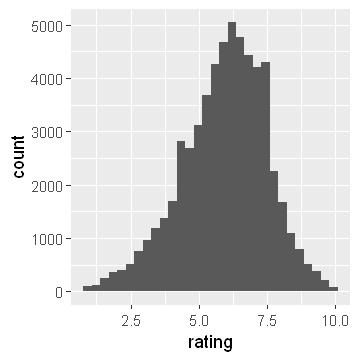

In [32]:
hist <- ggplot(data=movies, aes(x=rating)) + # Data (data frame) and aesthetics (i.e. columns for x and y) layer
        geom_histogram()                     # Geometries layer (specify graph/mark type) 

hist

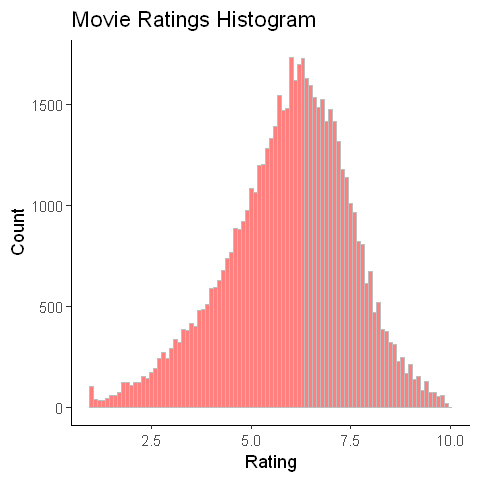

In [119]:
hist <- ggplot(data=movies, aes(x=rating)) +                                # Data (data frame) and aesthetics (columns for x and y)
        geom_histogram(binwidth=0.1, color="grey", fill="red", alpha=0.5) + # Geometries layer with specified options
        xlab("Rating") + ylab("Count") +                                    # Coordinates layer (?)
        ggtitle("Movie Ratings Histogram") +                                # Title and subtitle layer (?)
        theme_classic()                                                     # Theme layer

hist

## Scatterplots

In [28]:
cars <- mtcars
head(x=cars, n=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


* Minimum needed to plot a histogram

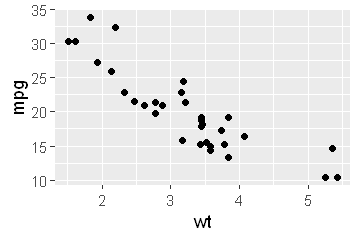

In [52]:
options(repr.plot.width=3, repr.plot.height=2)
scat <- ggplot(data=cars, aes(x=wt, y=mpg)) + # Data (data frame) and aesthetics (i.e. columns for x and y) layer
              geom_point()                    # Geometries layer with specified options
scat

* **If we want things like shape, size, color to be based on data in our data frame, we must pass them inside the `aes()` function inside the geometry layer.**
* Otherwise if we call them by some sort of standard integer value, we pass them by themselves inside the geometry layer. 
* Also we can define both color and shape based on a filed inside the **`aes()`** function.

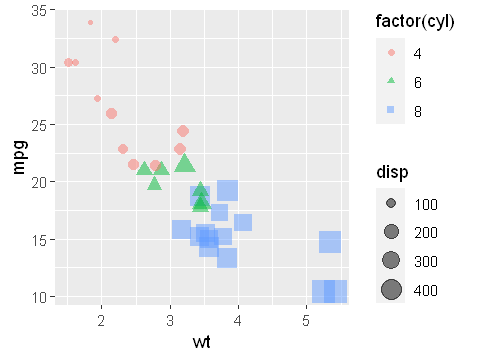

In [42]:
options(repr.plot.width=4, repr.plot.height=3)
scat <- ggplot(data=cars, aes(x=wt, y=mpg)) +                                        # Data (data frame) and aesthetics (i.e. columns for x and y) layer
        geom_point(aes(shape=factor(cyl), color=factor(cyl), size=disp), alpha=0.5)  # Geometries layer with specified options

scat

* More about color in the geometry layer. 
    * We can just say a simple statement like **`color="blue"`**.
    * We can also pass hex color codes, such as **`color="#43e8d8"`** (this is teal).
    * You can get hex color codes for your color **[here](https://www.color-hex.com/)**.

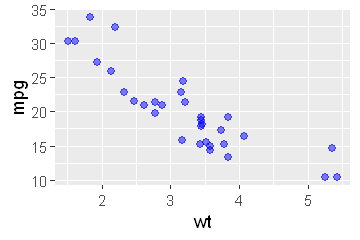

In [48]:
options(repr.plot.width=3, repr.plot.height=2)
scat2 <- ggplot(data=cars, aes(x=wt, y=mpg)) + 
         geom_point(size=2, alpha=0.5, color="blue")
scat2

* We can also control the scale color gradient  when we pass **`color()`** in the **`aes`**
* The **`scale_color_gradient()`** is outside the **`aes()`**, but it works because we defined **`color()`** inside it.

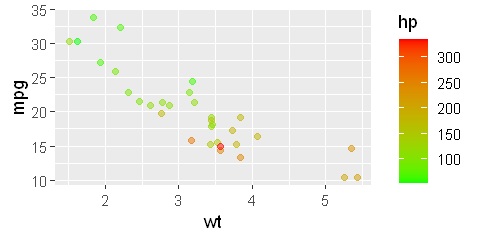

In [53]:
options(repr.plot.width=4, repr.plot.height=2)
scat3 <- ggplot(data=cars, aes(x=wt, y=mpg)) + 
         geom_point(aes(color=hp), alpha=0.5) +
         scale_color_gradient(low="green", high="red")
scat3

## Barplots

In [57]:
head(x=mpg, n=3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


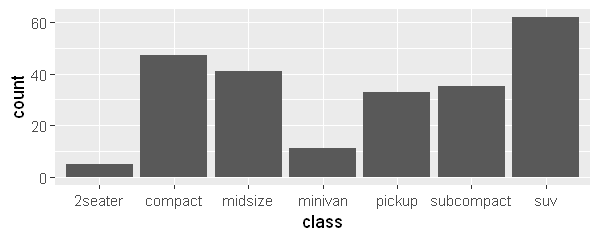

In [55]:
options(repr.plot.width=5, repr.plot.height=2)
bar <- ggplot(data=mpg, aes(x=class)) +
        geom_bar()
bar

* The **`fill`** parameter inside the mark/chart creates a stacked bar chart. 

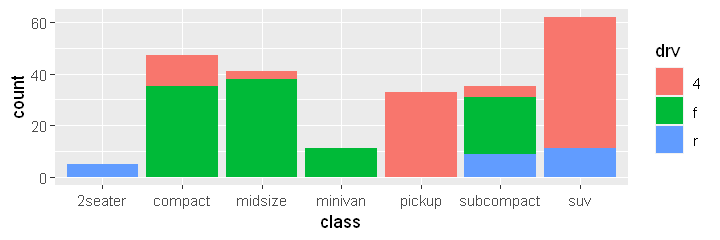

In [120]:
options(repr.plot.width=6, repr.plot.height=2)
bar <- ggplot(data=mpg, aes(x=class)) +
       geom_bar(aes(fill=drv))
bar

* With **`position="dodge"`** we make a culstered bar chart

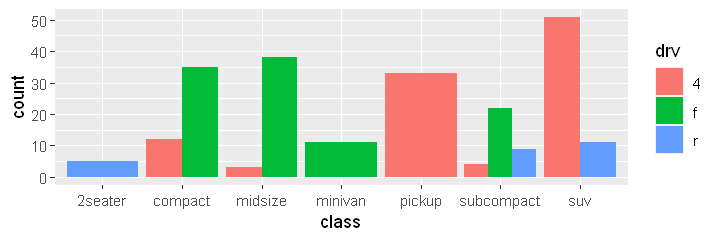

In [65]:
options(repr.plot.width=6, repr.plot.height=2)
bar <- ggplot(data=mpg, aes(x=class)) +
       geom_bar(aes(fill=drv), position="dodge")
bar

* With **`position="fill"`** we make a 100% stacked bar chart

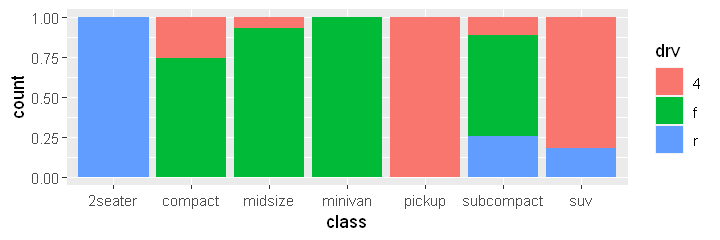

In [66]:
options(repr.plot.width=6, repr.plot.height=2)
bar <- ggplot(data=mpg, aes(x=class)) +
       geom_bar(aes(fill=drv), position="fill")
bar

## Box Plots

* Note that the x axis of a box plot must be categorical, so we need to put **`x=factor(column)`**

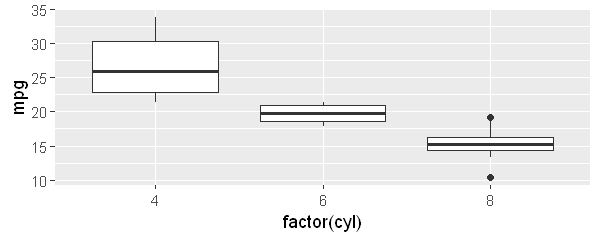

In [73]:
options(repr.plot.width=5, repr.plot.height=2)
box <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
       geom_boxplot()

box

* **`coord_flip()`** maxes the box plot horizontal

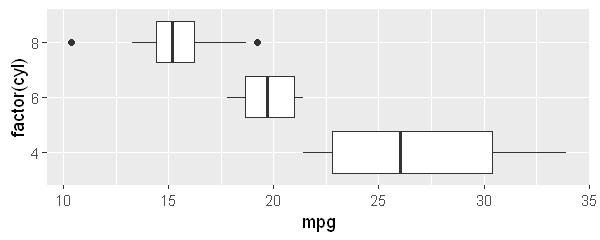

In [74]:
options(repr.plot.width=5, repr.plot.height=2)
box <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
       geom_boxplot() + 
       coord_flip()

box

* We can set coloring options in the geometry layer

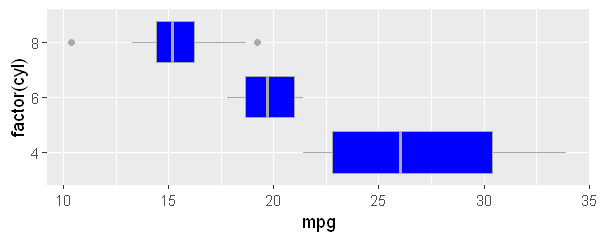

In [112]:
options(repr.plot.width=5, repr.plot.height=2)
box <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
       geom_boxplot(fill="blue", color="darkgrey") + 
       coord_flip()
box

* Putting them in an aesthetics function, it can depend on column values.
* With **theme_** if you press tab, you get all the available themes. 
* Installing library **`ggthemes`** gives you additional theme options.

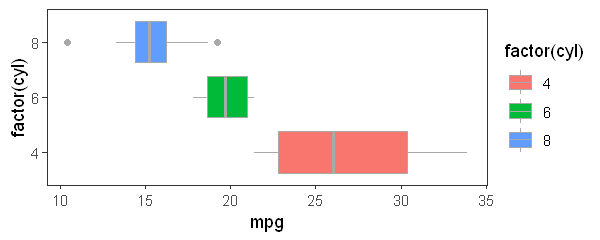

In [145]:
options(repr.plot.width=5, repr.plot.height=2)
box <- ggplot(data=df, aes(x=factor(cyl), y=mpg)) + 
       geom_boxplot(aes(fill=factor(cyl)), color="darkgrey") + 
       coord_flip() + 
       theme_test()
box

## Two-variable Plotting

In [90]:
head(x=movies, n=3)

title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,...,4.5,4.5,,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,...,4.5,14.5,,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,...,24.5,24.5,,0,1,0,0,0,0,1


**Heatmap**

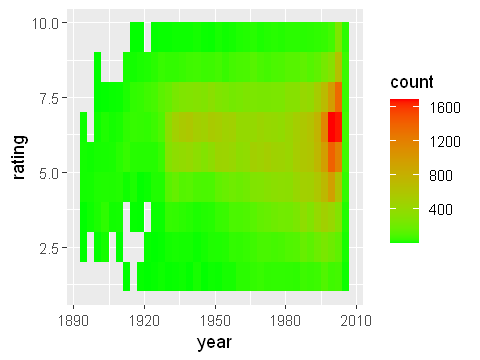

In [96]:
options(repr.plot.width=4, repr.plot.height=3)
heat <- ggplot(data=movies, aes(x=year, y=rating))+
        geom_bin2d(binwidth=c(3,1)) +                # Adding a binwidth, changes the default bin size
        scale_fill_gradient(high="red", low="green") # Adding, changes the default gradient
heat

**Hexmap**

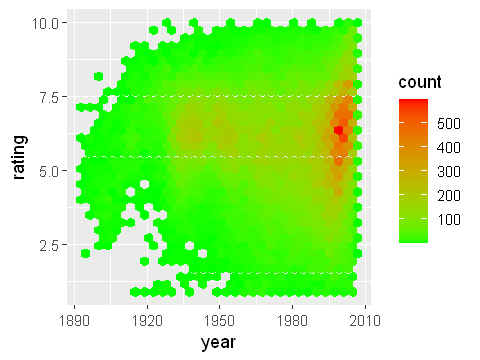

In [99]:
options(repr.plot.width=4, repr.plot.height=3)
heat <- ggplot(data=movies, aes(x=year, y=rating))+
        geom_hex() +                                 # Adding a binwidth, changes the default bin size
        scale_fill_gradient(high="red", low="green") # Adding, changes the default gradient
heat

**Density Plot**

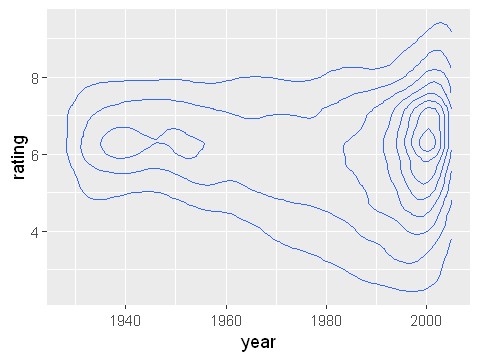

In [113]:
options(repr.plot.width=4, repr.plot.height=3)
density <- ggplot(data=movies, aes(x=year, y=rating)) + 
           geom_density_2d()
density

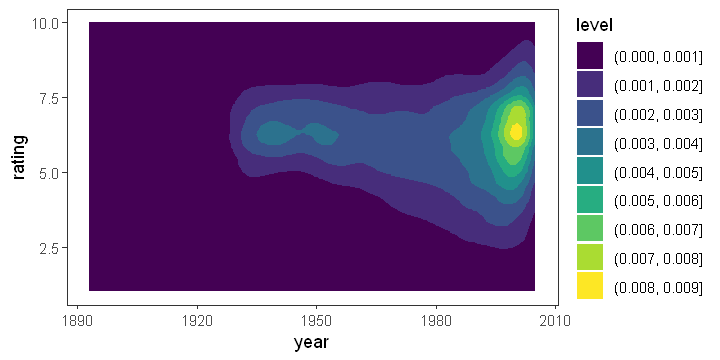

In [104]:
options(repr.plot.width=6, repr.plot.height=3)
density <- ggplot(data=movies, aes(x=year, y=rating)) + 
           geom_density_2d_filled() + 
           theme_test()
density

## Coordinates 

* They allow us to resize our plots correctly. 

In [105]:
head(x=mpg, n=3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


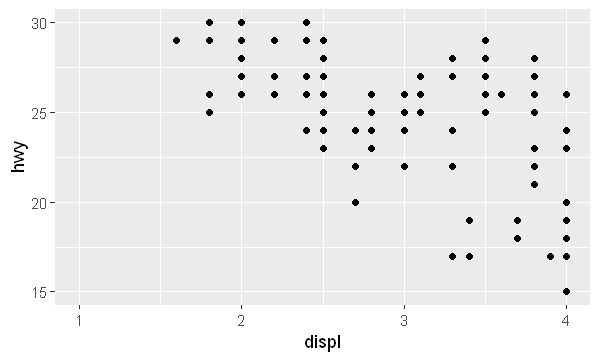

In [110]:
options(repr.plot.width=5, repr.plot.height=3)
sct <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
        geom_point() + 
        coord_cartesian(xlim=c(1,4), ylim=c(15, 30)) # Crop part of the graph by setting axis limits
sct

* We can also control the graphs aspect ratio with **`coord_fixed()`**

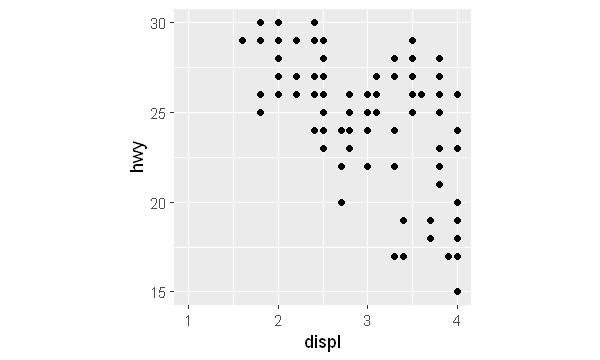

In [111]:
options(repr.plot.width=5, repr.plot.height=3)
sct <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
        geom_point() + 
        coord_fixed(ratio=1/5, xlim=c(1,4), ylim=c(15, 30)) # Crop part of the graph by setting axis limits
sct

## Faceting 

* Faceting allows us to place several plots next to eachother.
* The general faceting syntax is **`facet_grid(y_faceting ~ x_faceting)`**
* If there is not x or y faceting, you enter period **`.`**

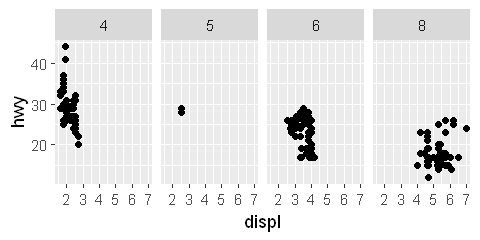

In [115]:
options(repr.plot.width=4, repr.plot.height=2)
facet1d <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
           geom_point() +   
           # coord_fixed(ratio=1/4) + 
           facet_grid(. ~ cyl)

facet1d

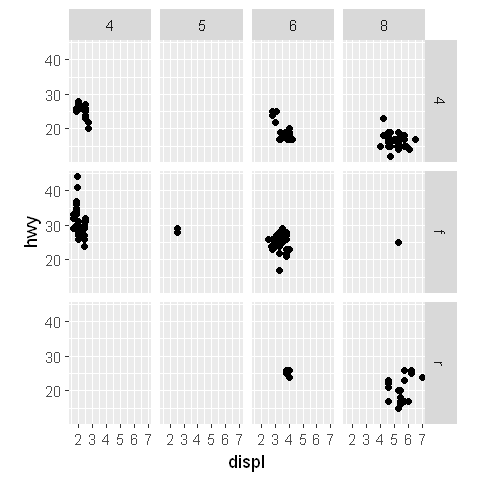

In [116]:
options(repr.plot.width=4, repr.plot.height=4)
facet2d <- ggplot(data=mpg, aes(x=displ, y=hwy)) + 
           geom_point() +   
           coord_fixed(ratio=1/4) + 
           facet_grid(drv ~ cyl)

facet2d

## Interactive Visualizations with **`plotly`** 

* By using the **`ggplotly()`** function we can convert any ggplot graph to an interactive plotly graph!

In [148]:
options(repr.plot.width=4, repr.plot.height=3)
scat <- ggplot(data=cars, aes(x=wt, y=mpg)) +                                        # Data (data frame) and aesthetics (i.e. columns for x and y) layer
        geom_point(aes(shape=factor(cyl), color=factor(cyl), size=disp), alpha=0.5)  # Geometries layer with specified options

scat <- ggplotly(scat)

ERROR: Error in ggplotly(scat): could not find function "ggplotly"
